In [1]:
import os
import matplotlib.pyplot as plt
import potion.visualization.notebook_utils as nu

# CARTPOLE UNSAFE: hyperparameter tuning

* sigmainit = 5

In [2]:
os.chdir('/home/matteo/policy-optimization/results/cartpole_unsafe')
dfs = nu.load_all('contcartpole')


MEPG01: 884.664336 +- 147.622338
MEPG02: 733.681366 +- 239.775149
MEPG10: 258.382454 +- 237.406453
MEPG11: 753.417433 +- 71.697430
MEPG12: 822.877426 +- 57.055944
MEPG20: 46.086322 +- 5.032128
MEPG21: 60.081314 +- 7.934826
MEPG22: 242.077762 +- 7.150664


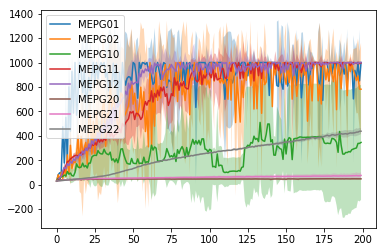

MEPG01: 2.169984 +- 0.856246
MEPG02: 3.258365 +- 0.181854
MEPG10: 1.294132 +- 1.646815
MEPG11: 2.638861 +- 0.427641
MEPG12: 3.168995 +- 0.084143
MEPG20: 0.225028 +- 0.321161
MEPG21: 1.132650 +- 0.348969
MEPG22: 2.832721 +- 0.075750


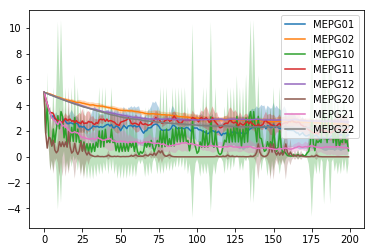

In [32]:
nu.compare('contcartpole', 
        ['MEPG01', 'MEPG02', 'MEPG10', 'MEPG11', 'MEPG12', 'MEPG20', 'MEPG21', 'MEPG22'],
        separate=False,
          keys=['UPerf', 'Exploration'])

* sigmainit = 1

LOW01: 842.136840 +- 138.301765
LOW11: 496.205116 +- 114.794265
LOW21: 44.736892 +- 1.754076
LOW12: 234.912742 +- 13.948915


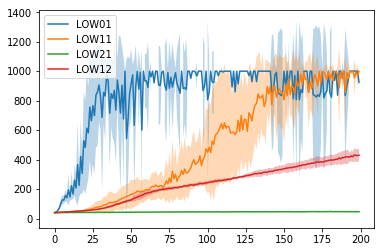

LOW01: 1.798390 +- 0.812851
LOW11: 2.040140 +- 0.652442
LOW21: 0.619553 +- 0.260368
LOW12: 1.185626 +- 0.115969


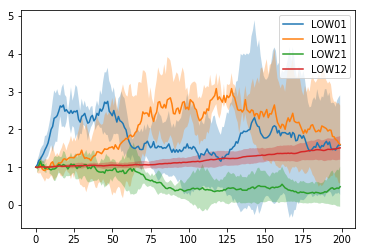

In [31]:
nu.compare('contcartpole', 
        ['LOW01', 'LOW11', 'LOW21', 'LOW12'],
        separate=False,
          keys=['UPerf', 'Exploration'])

## GPOMDP (Greedy)

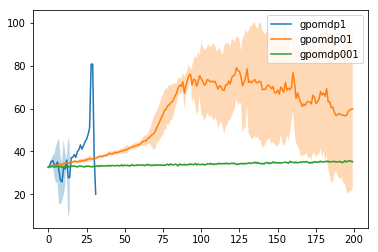

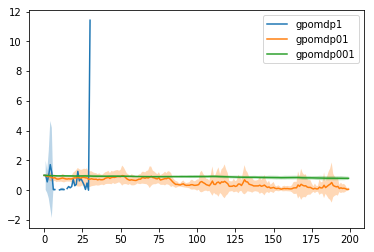

In [5]:
compare('contcartpole', 
        ['gpomdp1', 'gpomdp01', 'gpomdp001'], 
        ['Perf','Exploration'],
        separate=False)